# Image classification

In [18]:
# fmnist dataset image classification using CNN architecture

# import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# check the tensorflow version
print(tf.__version__)

2.19.0


In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [21]:
# load the fmnist dataset
fasion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# seprating the training images from the test images and labels
(train_images, train_labels), (test_images, test_labels) = fasion_mnist

In [22]:
# shape of each dataset
print("Train Images: ", train_images.shape)
print("Train Labels: ", train_labels.shape)
print("Test Images: ", test_images.shape)
print("Test Labels: ", test_labels.shape)

Train Images:  (60000, 28, 28)
Train Labels:  (60000,)
Test Images:  (10000, 28, 28)
Test Labels:  (10000,)


Text(0.5, 0, '8')

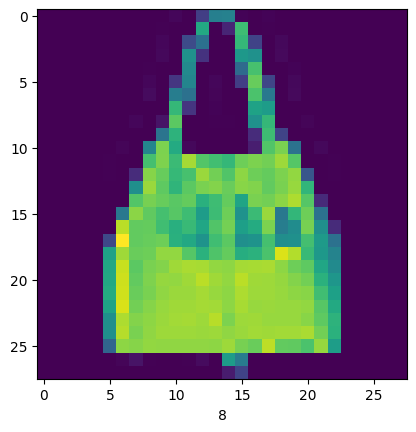

In [23]:
# Display an image
plt.imshow(train_images[59000])
plt.xlabel(train_labels[59000])

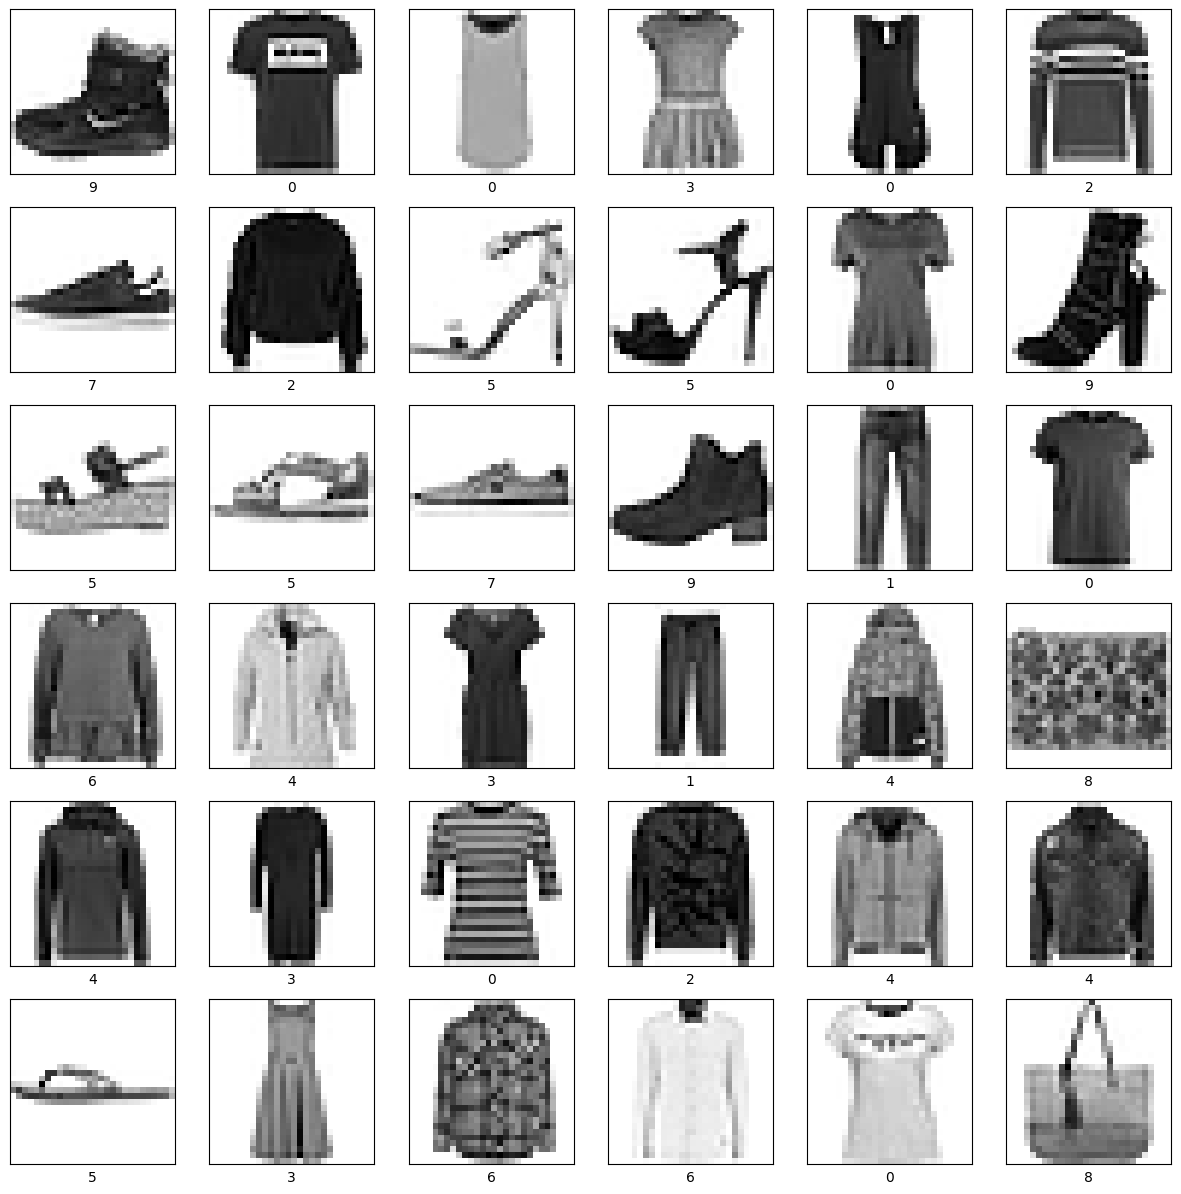

In [24]:
# Display some sample images
plt.figure(figsize=(15 , 15))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [25]:
len(train_images)

60000

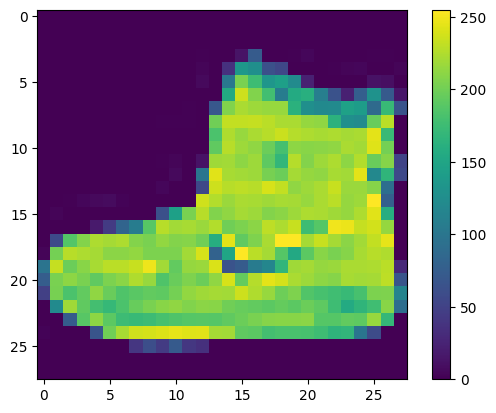

In [26]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
# Display the values of each pixel in the image
print("Pixel values:")
for row in train_images[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3 
  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15 
  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66 
  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 21

In [28]:
# Normalizing data - data will be in range from 0 to 1. Maximum pixel value is 255.
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

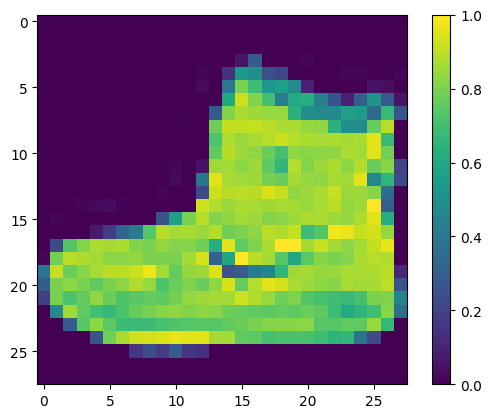

In [29]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pixel values:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.004 0.000 0.000 0.051 0.286 0.000 0.000 0.004 0.016 0.000 0.000 0.000 0.000 0.004 0.004 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.000 0.141 0.533 0.498 0.243 0.212 0.000 0.000 0.000 0.004 0.012 0.016 0.000 0.000 0.012 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.024 0.000 0.400 0.800 0.690 0.525 0.565 0.482 0.090 0.000 0.000 0.0

<Figure size 640x480 with 0 Axes>

<Axes: >

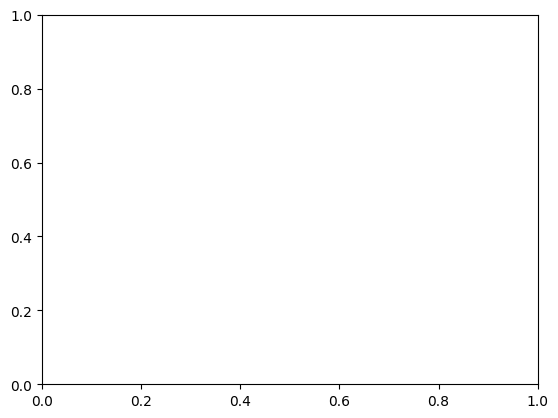

In [30]:
# Display the values of each pixel in the image
print("Pixel values:")
for row in train_images[0]:
    for pixel in row:
        # print("{:0.3}".format(pixel), end=" ")
        print(f"{pixel:0.3f}", end=" ")

    print()
display(plt.gcf())
display(plt.gca())

In [31]:
# Reshape the images to have a channel dimension
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1) # 1 is for grey scale and 3 is for RGB
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [32]:
# Number of classes
K = len(set(train_labels))
K

10

## Build the model

In [33]:
# create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)), # input layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), # convolutional layer
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)), # pooling layer
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), # convolutional layer
    tf.keras.layers.MaxPooling2D(), # pooling layer
    tf.keras.layers.Flatten(), # flatten layer
    tf.keras.layers.Dense(K, activation='softmax') # output layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

2025-09-21 19:14:26.271348: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,586 (96.04 KB)

 Trainable params: 24,586 (96.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [34]:
%%time
# Define the callback function
early_stopping = EarlyStopping(patience=3)

# train the model
model.fit(train_images, train_labels, epochs=20, batch_size=16, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping])
# model.fit(train_images, train_labels, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7428 - loss: 0.7208 - val_accuracy: 0.8655 - val_loss: 0.3782
Epoch 2/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8718 - loss: 0.3640 - val_accuracy: 0.8827 - val_loss: 0.3346
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8901 - loss: 0.3050 - val_accuracy: 0.8848 - val_loss: 0.3139
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8972 - loss: 0.2795 - val_accuracy: 0.8751 - val_loss: 0.3456
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9028 - loss: 0.2642 - val_accuracy: 0.8940 - val_loss: 0.2991
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9116 - loss: 0.2434 - val_accuracy: 0.9023 - val_loss: 0.2756
Epoch 7/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9172 - loss: 0.2289 - val_accuracy: 0.8958 - val_loss: 0.3045
Epoch 8/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9196 - loss: 0

## Plot loss and accuracy

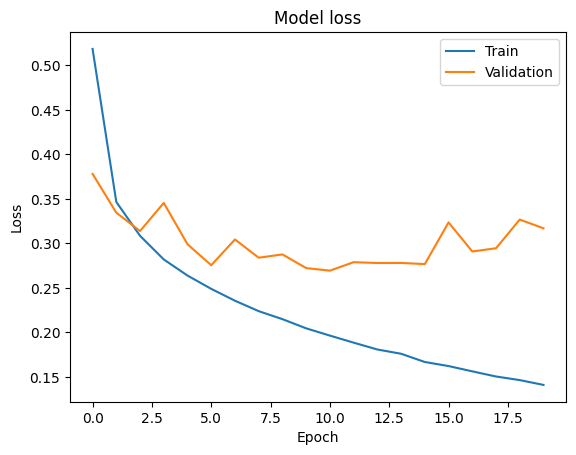

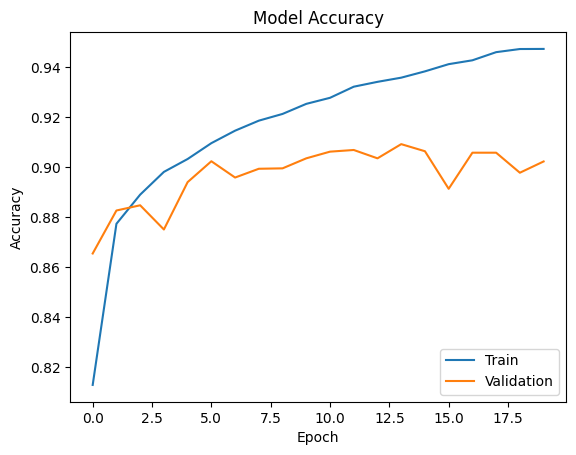

In [46]:
# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [47]:
# model evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)


313/313 - 1s - 2ms/step - accuracy: 0.9004 - loss: 0.3262

Test loss: 0.3261670172214508

Test accuracy: 0.9003999829292297


In [ ]:
# save the model
# model.save('models_saved/fashion_mnist_model.h5')
model.save('models_saved/fashion_mnist_model.keras')

# Predicting an image

(28, 28, 1)


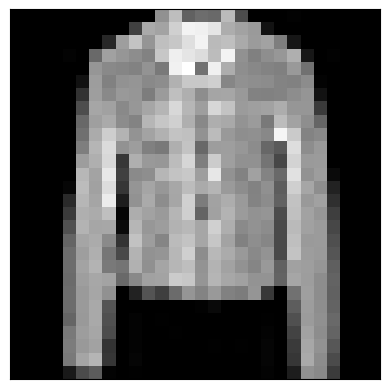

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The model predicts that this image is a 'Coat' i.e; 4.
Actual label of this image is 'Coat'


In [80]:
# grab a test image
img = test_images[10]
print(img.shape)

plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()
# predict the image
predictions = model.predict(img.reshape(1, 28, 28, 1))
print(f"The model predicts that this image is a '{class_names[predictions.argmax()]}' i.e; {predictions.argmax()}.")
print(f"Actual label of this image is '{class_names[test_labels[10]]}'")

# Make predictions on all test images

In [48]:
test_images.shape

(10000, 28, 28, 1)

In [49]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [50]:
print("Predictions shape: ", predictions.shape) # each image contains 10 probabilities for each class

Predictions shape:  (10000, 10)


In [51]:
predictions[0] # probabilities of test_images[0] for each class. i.e; what's the probability of being 0,1,2,3,4,5,6,7,8,9

array([1.6915409e-12, 1.2554499e-21, 1.7970060e-12, 3.3517032e-15,
       8.8692259e-13, 7.6496356e-08, 9.1807950e-14, 1.6583121e-07,
       4.6873838e-10, 9.9999976e-01], dtype=float32)

In [52]:
# class with highest probability
predictions[0].argmax() # it returns the index of the class with highest probability

np.int64(9)

In [53]:
test_labels[50]

np.uint8(4)

In [54]:
predictions[50]

array([3.6906709e-03, 3.8959377e-11, 5.3223344e-03, 6.7627388e-09,
       9.8802197e-01, 1.9662275e-16, 2.9650202e-03, 7.5865353e-23,
       2.5284454e-08, 1.6250342e-12], dtype=float32)

In [55]:
# class with highest probability for test_images[50]
np.argmax(predictions[50])

np.int64(4)

In [56]:
# take max predicted index from all predictions
predicted_labels = np.argmax(predictions, axis=1)

print("Predicted labels: ", predicted_labels)
print("Actual labels: ", test_labels)

Predicted labels:  [9 2 1 ... 8 1 5]
Actual labels:  [9 2 1 ... 8 1 5]


In [57]:
# applt metrics: precision and recall score
from sklearn.metrics import classification_report
# classification report
print("Classification Report:\n", classification_report(test_labels, predicted_labels, target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.98      0.99      0.98      1000
    Pullover       0.85      0.86      0.86      1000
       Dress       0.93      0.88      0.90      1000
        Coat       0.81      0.91      0.85      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.76      0.64      0.70      1000
     Sneaker       0.93      0.98      0.95      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



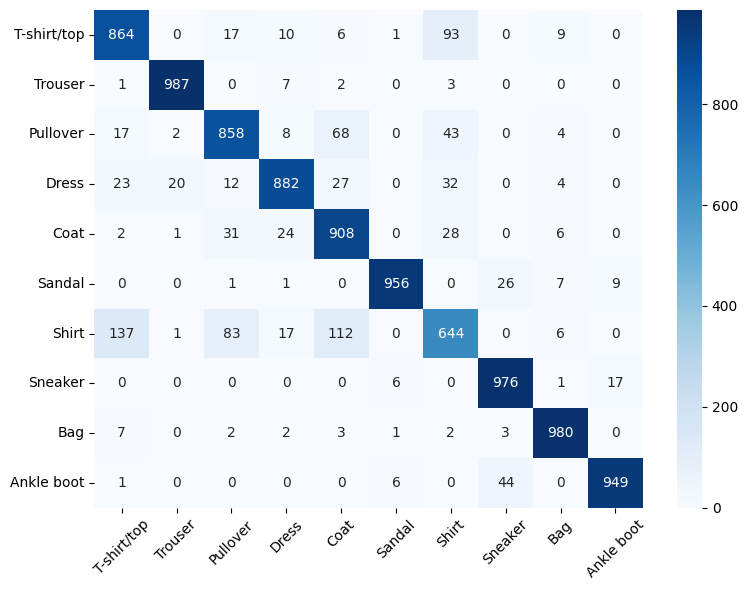

In [ ]:
# draw a confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and obtained the predicted labels and true labels
# predicted_labels and true_labels are NumPy arrays containing the predicted and true labels respectively

cm = confusion_matrix(test_labels, predicted_labels) # Create the confusion matrix

# Define the class labels for Fashion MNIST (assuming there are 10 classes)
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
